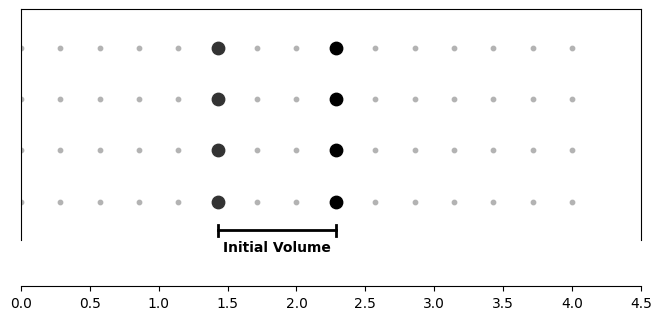

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import FancyArrowPatch
from IPython.display import HTML
import os

# Wave parameters
A = 0.6
v = 1.0
delta_x_idx = 3
x0 = 0.0
width = 0.9

# Particle grid
x_positions = np.linspace(0, 4, 15)
y_positions = np.linspace(-0.4, 0.4, 4)
X, Y = np.meshgrid(x_positions, y_positions)
x = X.flatten(order='F')
y = Y.flatten(order='F')

# Columns to track
col1_idx = 5
col2_idx = col1_idx + delta_x_idx
num_rows = len(y_positions)
col1_mask = np.arange(len(x)) // num_rows == col1_idx
col2_mask = np.arange(len(x)) // num_rows == col2_idx

# Set up figure
fig, ax = plt.subplots(figsize=(8,3))
scat = ax.scatter(x, y, s=40, color='0.7', marker='.')
col1_scat = ax.scatter(x[col1_mask], y[col1_mask], s=80, color='0.2', marker='o')
col2_scat = ax.scatter(x[col2_mask], y[col2_mask], s=80, color='0.0', marker='o')

ax.set_xlim(0, 4.5)
ax.set_ylim(-0.6, 0.6)
ax.set_yticks([])

# Move x-axis down
ax.spines['bottom'].set_position(('axes', -0.2))
ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_label_coords(0.5, -0.15)

# Arrow parameters
arrow_y = -0.55
x1_eq = x[col1_mask][0]
x2_eq = x[col2_mask][0]

# Arrow line
arrow_line, = ax.plot([x1_eq, x2_eq], [arrow_y, arrow_y], color='black', lw=2)

# Vertical end caps for |<-->| style
cap_height = 0.03
cap1 = ax.plot([x1_eq, x1_eq], [arrow_y - cap_height, arrow_y + cap_height], color='black', lw=2)[0]
cap2 = ax.plot([x2_eq, x2_eq], [arrow_y - cap_height, arrow_y + cap_height], color='black', lw=2)[0]

# Label
label_text = ax.text((x1_eq + x2_eq)/2, arrow_y - 0.05, "Initial Volume",
                     ha='center', va='top', fontsize=10, fontweight='bold')

# Update function
def update(frame):
    t = frame / 20
    pulse = np.exp(-((x - x0 - v*t)/width)**2)
    displacement = A * pulse
    scat.set_offsets(np.c_[x + displacement, y])

    col1_disp = A * np.exp(-((x[col1_mask] - x0 - v*t)/width)**2)
    col2_disp = A * np.exp(-((x[col2_mask] - x0 - v*t)/width)**2)
    col1_scat.set_offsets(np.c_[x[col1_mask] + col1_disp, y[col1_mask]])
    col2_scat.set_offsets(np.c_[x[col2_mask] + col2_disp, y[col2_mask]])

    # Update arrow line and caps
    x1_inst = x[col1_mask][0] + col1_disp[0]
    x2_inst = x[col2_mask][0] + col2_disp[0]
    arrow_line.set_data([x1_inst, x2_inst], [arrow_y, arrow_y])
    cap1.set_data([x1_inst, x1_inst], [arrow_y - cap_height, arrow_y + cap_height])
    cap2.set_data([x2_inst, x2_inst], [arrow_y - cap_height, arrow_y + cap_height])

    # Update label
    if np.isclose(x1_inst - x2_inst, x1_eq - x2_eq, atol=1e-4):
        label_text.set_text("Initial Volume")
    else:
        label_text.set_text("New Volume")
    label_text.set_position(((x1_inst + x2_inst)/2, arrow_y - 0.05))

    return scat, col1_scat, col2_scat, arrow_line, cap1, cap2, label_text

# Animate and display
ani = animation.FuncAnimation(fig, update, frames=200, interval=50)
HTML(ani.to_jshtml())

# --- Save frames as PNG images ---
output_dir = "frames"
os.makedirs(output_dir, exist_ok=True)

for frame in range(200):
    update(frame)  # draw current frame
    plt.savefig(f"{output_dir}/frame_{frame:04d}.png", dpi=150)
